In [64]:
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import cmocean as cmo
import matplotlib.animation as animation
from matplotlib.colors import LightSource
from matplotlib import cm
import matplotlib.colors

In [65]:
# Open laddie output and print coordinates and available variables
laddie_output = xr.open_dataset(f'../output/CD/output_000020.nc')
print(laddie_output.var)

<bound method DatasetAggregations.var of <xarray.Dataset>
Dimensions:  (x: 295, y: 340)
Coordinates:
  * x        (x) int32 -1610500 -1610000 -1609500 ... -1464500 -1464000 -1463500
  * y        (y) int32 -701500 -701000 -700500 ... -533000 -532500 -532000
Data variables: (12/14)
    Ut       (y, x) float64 ...
    Vt       (y, x) float64 ...
    D        (y, x) float64 ...
    T        (y, x) float64 ...
    S        (y, x) float64 ...
    melt     (y, x) float64 ...
    ...       ...
    detr     (y, x) float64 ...
    mask     (y, x) int8 ...
    zb       (y, x) float64 ...
    B        (y, x) float32 ...
    mav      float64 ...
    mmax     float64 ...
Attributes:
    model_name:     LADDIE
    model_version:  1.1
    time_start:     19.0
    time_end:       20.0>


In [66]:
# Define colormaps for plots

## melt 
vmax = 100
vmin = -10
linthresh = .3
linscale = .25
fracpos = (np.log10(vmax/linthresh)+linscale)/(np.log10(vmax/linthresh)+np.log10(-(vmin/linthresh))+2*linscale)
nneg = np.int_((1-fracpos)*256)
# combine them and build a new colormap
colors1 = plt.get_cmap('cmo.ice_r')(np.linspace(0,1.,nneg+1))
colors2 = plt.get_cmap('inferno')(np.linspace(0., 1, 256-nneg-1))
colors = np.vstack((colors1, colors2))
cmap_melt = mpl.colors.LinearSegmentedColormap.from_list('my_colormap', colors)
norm_melt = mpl.colors.SymLogNorm(linthresh, vmin=-10, vmax=100, linscale=linscale)

## mask grounded
cmap_ground = matplotlib.colors.LinearSegmentedColormap.from_list("", ["gainsboro",(0.7019607843137254, 0.803921568627451, 0.8901960784313725, 1.0)]) # grounded = 2
norm_ground = mpl.colors.Normalize(vmin= 3, vmax = 4 )

## mask ocean
cmap_ocean = plt.get_cmap('gist_earth') # ocean = 0
norm_ocean = mpl.colors.Normalize(vmin=0, vmax=3.7)

## mixed layer depth thickness
cmap_D = plt.get_cmap('Blues')
norm_D = mpl.colors.Normalize(vmin=0,vmax=150)

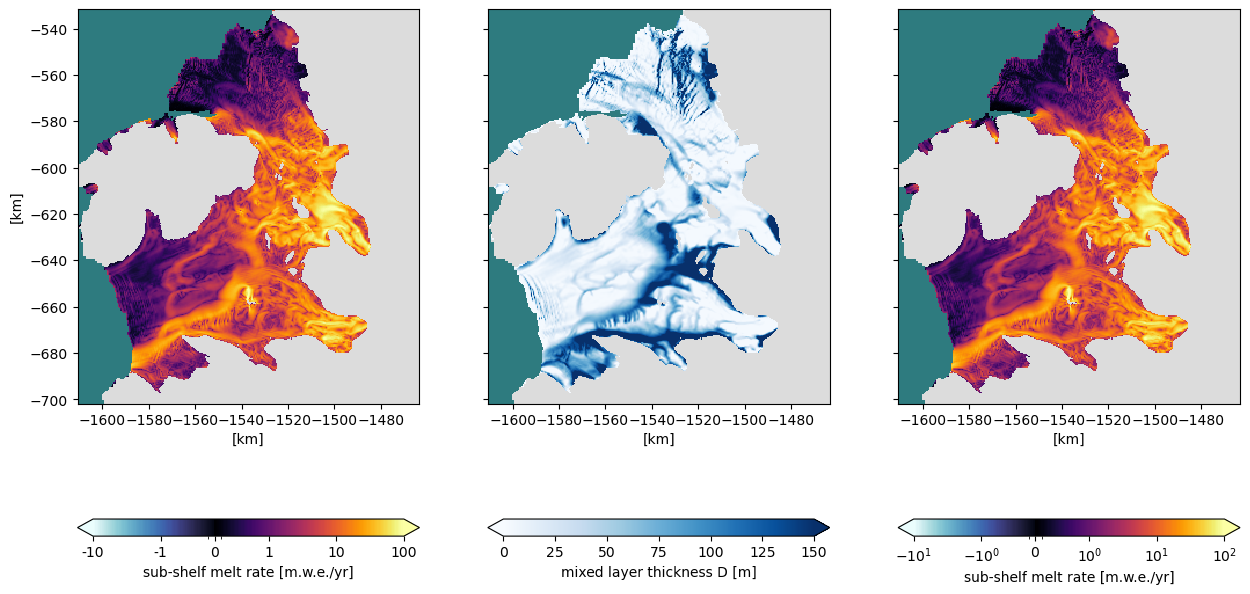

In [69]:
# Plot melt field and mixed layer depth
fig,ax = plt.subplots(1,3,figsize=(15,10),sharex=True, sharey=True)

# Show melt
im = ax[0].pcolormesh(laddie_output.x/1000, laddie_output.y/1000, laddie_output.melt, cmap = cmap_melt, norm = norm_melt)
cbar = plt.colorbar(im, ax = ax[0], extend='both', ticks=[-10,-1,0,1,10,100], orientation = 'horizontal', label='sub-shelf melt rate [m.w.e./yr]')
cbar.set_ticklabels([-10,-1,0,1,10,100])

# Show mixed layer depth
im = ax[1].pcolormesh(laddie_output.x/1000, laddie_output.y/1000, laddie_output.D, cmap = cmap_D, norm = norm_D)
cbar = plt.colorbar(im, ax = ax[1], extend='both', orientation = 'horizontal', label='mixed layer thickness D [m]')

# Show draft
im = ax[2].pcolormesh(laddie_output.x/1000, laddie_output.y/1000, laddie_output.zb, cmap = cmap_melt, norm = norm_melt)
cbar = plt.colorbar(im, ax = ax[2], extend='both', ticks=[-10,-1,0,1,10,100], orientation = 'horizontal', label='sub-shelf melt rate [m.w.e./yr]')

# Set labels and mask ocean and grounded ice
for axs in ax:
    axs.set_aspect(1)
    axs.set_xlabel('[km]')
    axs.pcolormesh(laddie_output.x/1000, laddie_output.y/1000, xr.where(laddie_output.mask==0, 1, np.nan), cmap=cmap_ocean, norm=norm_ocean)
    axs.pcolormesh(laddie_output.x/1000, laddie_output.y/1000, xr.where(laddie_output.mask==2, 1, np.nan), cmap=cmap_ground, norm=norm_ground)
ax[0].set_ylabel('[km]');
